In [4]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon,nd,init
from mxnet.gluon import data as gdata, loss as gloss, nn

笔记：权重衰减等价于L2 范数正则化（regularization），正则化包含（l1和l2）
当λ较大时，惩罚项在损失函数中的比重加大，就会使权重参数的元素变小
L2范数正则化令权重参数先自乘以小于1的数，再减去不含惩罚项的梯度。

3.12.2 ⾼维线性回归实验 

In [5]:
n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = nd.ones((num_inputs, 1)) * 0.01, 0.05
features = nd.random.normal(shape=(n_train + n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

3.12.3 从零开始实现

In [6]:
#初始化模型参数
def init_params():
    w = nd.random.normal(scale = 1, shape = (num_inputs,1))  #scale为标准差
    b = nd.zeros(shape = (1,))
    w.attach_grad()
    b.attach_grad()
    return [w,b]
#定义L2 范数惩罚项
def l2_penalty(w):
    return (w**2).sum()/2
#定义训练和测试
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(
train_features, train_labels), batch_size, shuffle=True)
def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
            # 添加了L2 范数惩罚项。
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b),train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b),test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().asscalar())

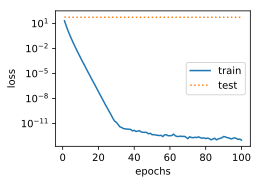

L2 norm of w: 11.61194


In [7]:
fit_and_plot(lambd=0)

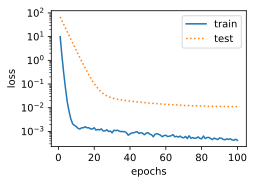

L2 norm of w: 0.04184248


In [8]:
fit_and_plot(lambd=3)

3.12.4 Gluon 实现

In [10]:
help(d2l.semilogy)

Help on function semilogy in module d2lzh.utils:

semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5))
    Plot x and log(y).

